# HW 1

### Step 1: GC-content calculation

In [9]:
from Bio import SeqIO
from matplotlib import pyplot as plt
import statistics
from collections import defaultdict

In [3]:
with open('data/test3_edited.fastq', 'w') as new:
    with open('data/test3.fastq', 'r') as old:
        for line in old:
            if line[0] == '+':
                new.write('+\n')
            else:
                new.write(line)

In [4]:
def get_GC_percentage(seq):
    G_cnt = seq.count('G')
    C_cnt = seq.count('C')
    return (G_cnt + C_cnt) / len(seq) * 100

In [30]:
def analyse_GC_content(fastq_file_path):
    cnt_to_percent = defaultdict(int)
    pers = []
    with open(fastq_file_path) as file:
        for record in SeqIO.parse(file, 'fastq'):
            percentage = round(get_GC_percentage(record.seq))
            pers.append(percentage)
            cnt_to_percent[percentage] += 1
    percent = []
    cnt = []
    for key in sorted(cnt_to_percent):
        percent.append(key)
        cnt.append(cnt_to_percent[key])
    plt.bar(percent, cnt)
    plt.ylabel("Number of reads")
    plt.xlabel("% GC")
    plt.show()

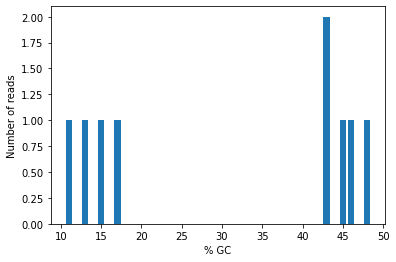

In [31]:
analyse_GC_content('data/test.fastq')

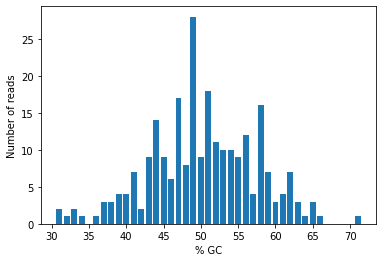

In [33]:
analyse_GC_content('data/test3_edited.fastq')

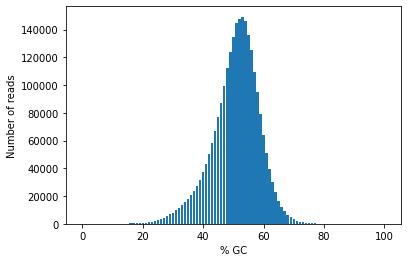

In [34]:
analyse_GC_content('data/100x.1.fastq')

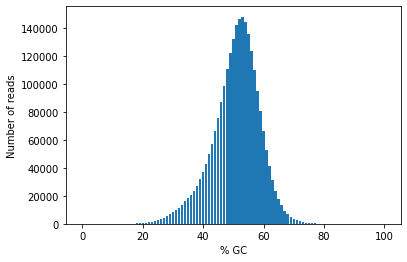

In [35]:
analyse_GC_content('data/100x.2.fastq')

### Step 2: Quality distribution

In [36]:
def analyse_quality_distribution(fastq_file_path, filetype='fastq-illumina'):
    quality = []
    with open(fastq_file_path) as file:
        for record in SeqIO.parse(file, filetype):
            record_quality = record.letter_annotations["phred_quality"]
            if len(quality) == 0:
                quality = [[] for i in range(len(record_quality))]
            for i in range(len(quality)):
                quality[i].append(record_quality[i])
    for i in range(len(quality)):
        quality[i] = statistics.mean(quality[i])
    x = range(len(quality))
    plt.plot(x, quality)
    plt.xlabel("Position in the read")
    plt.ylabel("Quality")
    plt.ylim([0, 40])
    plt.show()

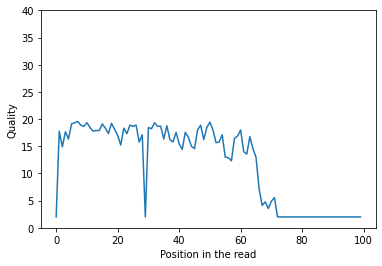

In [37]:
analyse_quality_distribution('data/test.fastq')

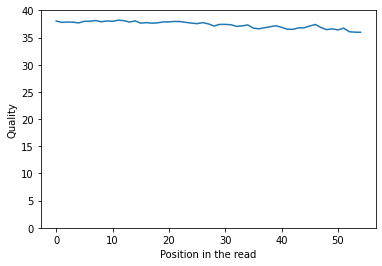

In [38]:
analyse_quality_distribution('data/test3_edited.fastq', 'fastq-sanger')

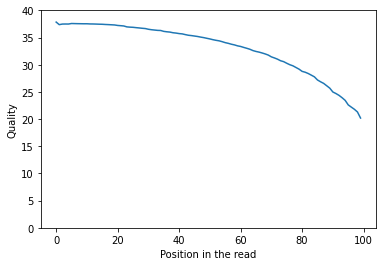

In [40]:
analyse_quality_distribution('data/100x.1.fastq', 'fastq-sanger')

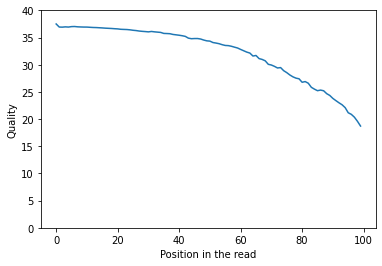

In [41]:
analyse_quality_distribution('data/100x.2.fastq', 'fastq-sanger')

### Step 3: Checking the results

In [43]:
from IPython.display import Image
from IPython.core.display import HTML 

1. GC-content

For test.fastq:

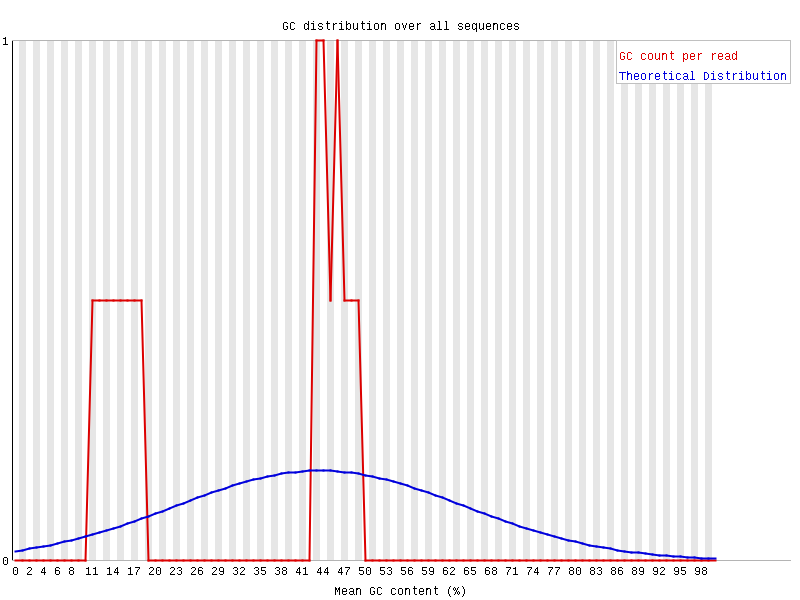

In [113]:
Image("data/test_GC_content.png")

This grahp coincides my result

For test3.fastq:

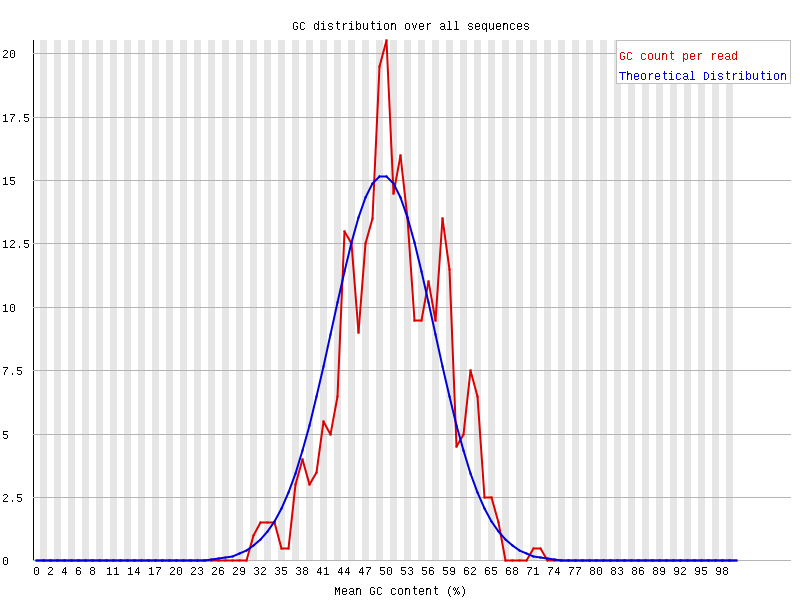

In [114]:
Image("data/test3_GC_content.png")

This grahp coincides my result

For 100x.1.fastq:

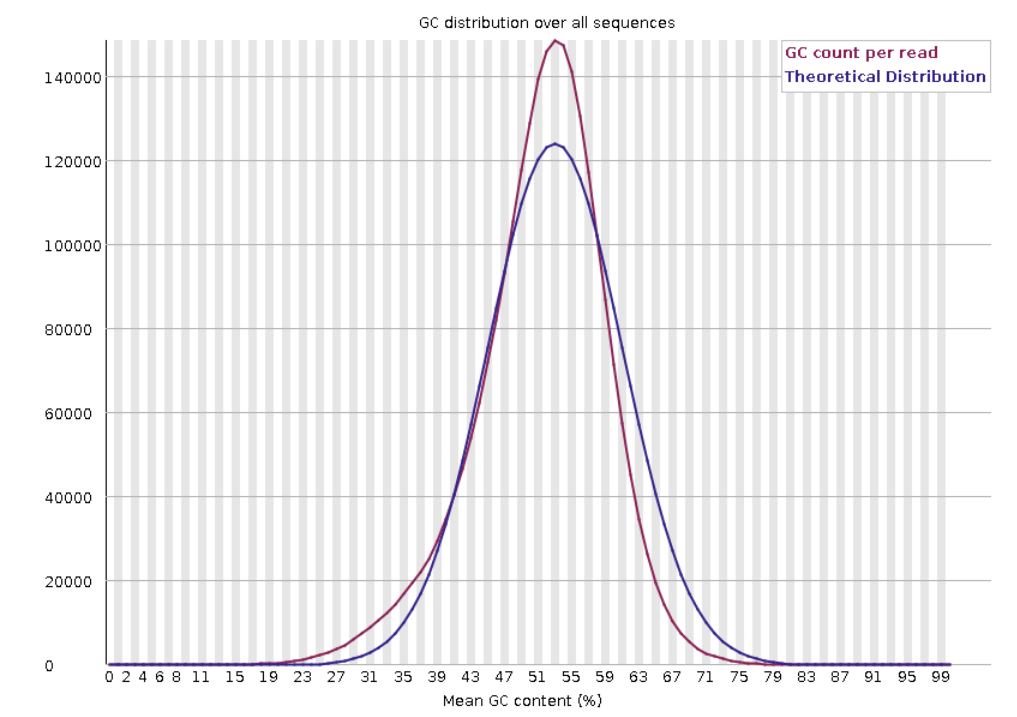

In [44]:
Image("data/100x.1_GC_content.png")

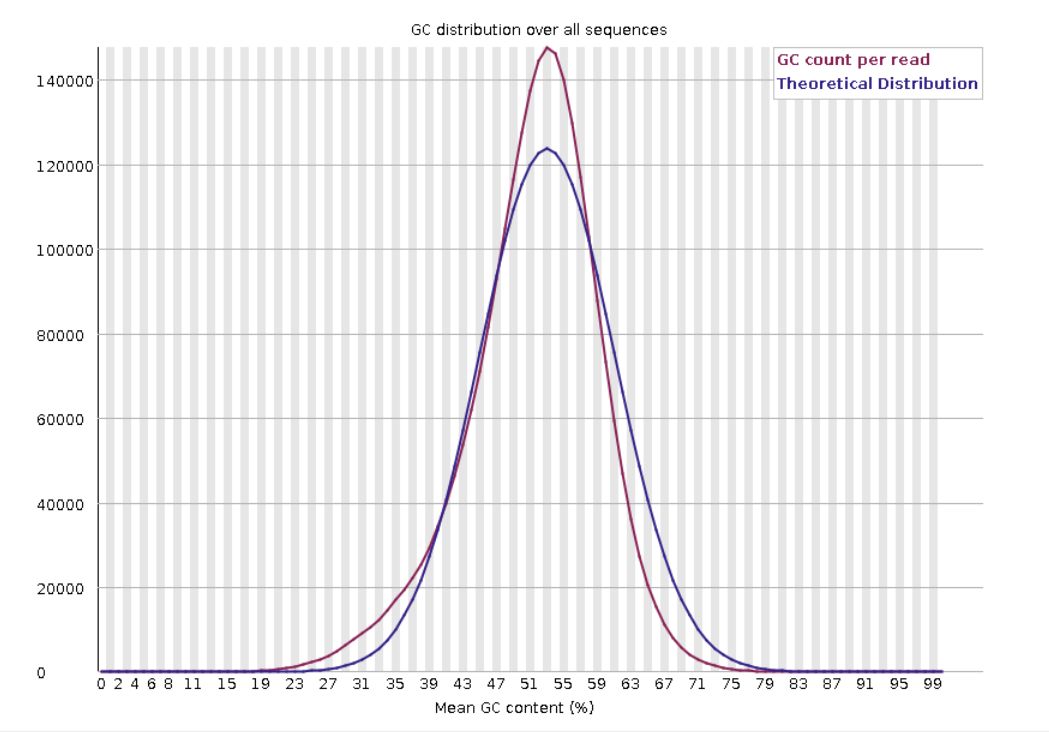

In [46]:
Image("data/100x.2_GC_content.png")

These graphs for 100x.1 and 100x.2 match my graphs

2. Per base quality

For test.fastq:

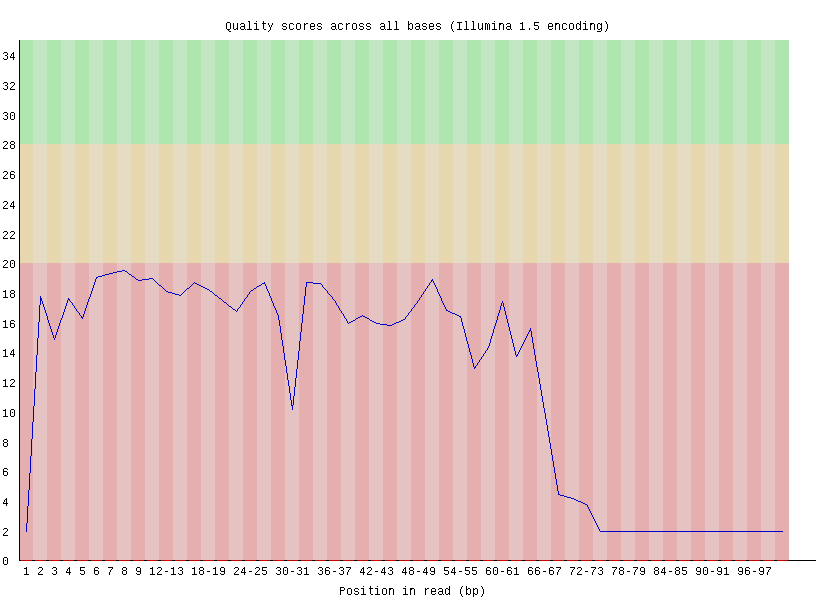

In [116]:
Image("data/test_quality.png")

This graph matches my result

For test3.fastq:

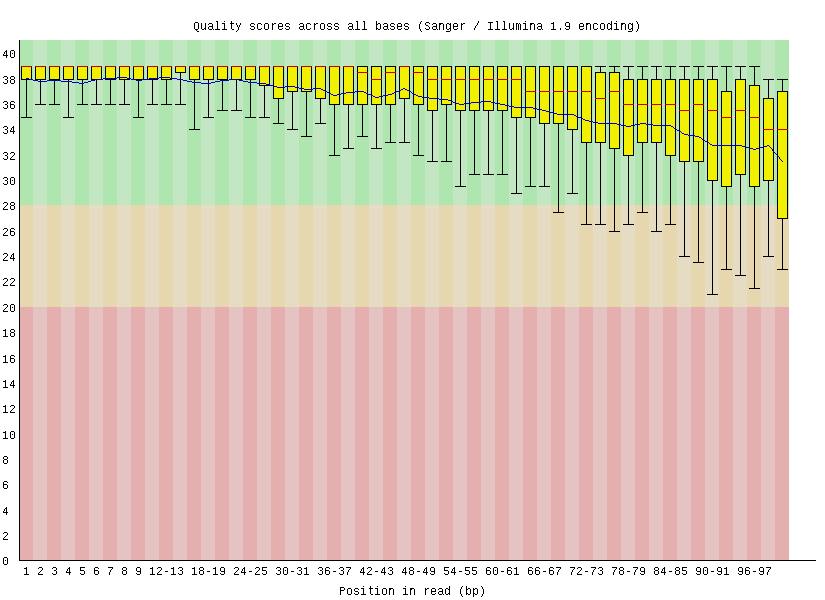

In [118]:
Image("data/test3_quality.png")

This grahp coincides my result

For 100x.1.fastq and 100z.2.fastq:

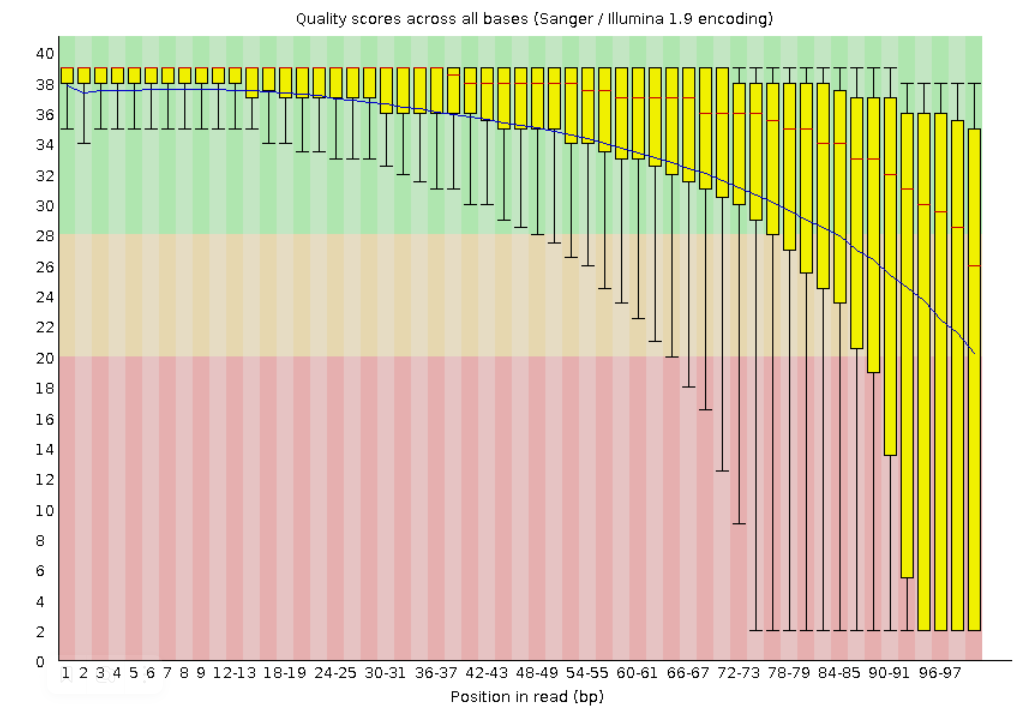

In [47]:
Image("data/100x.1_quality.png")

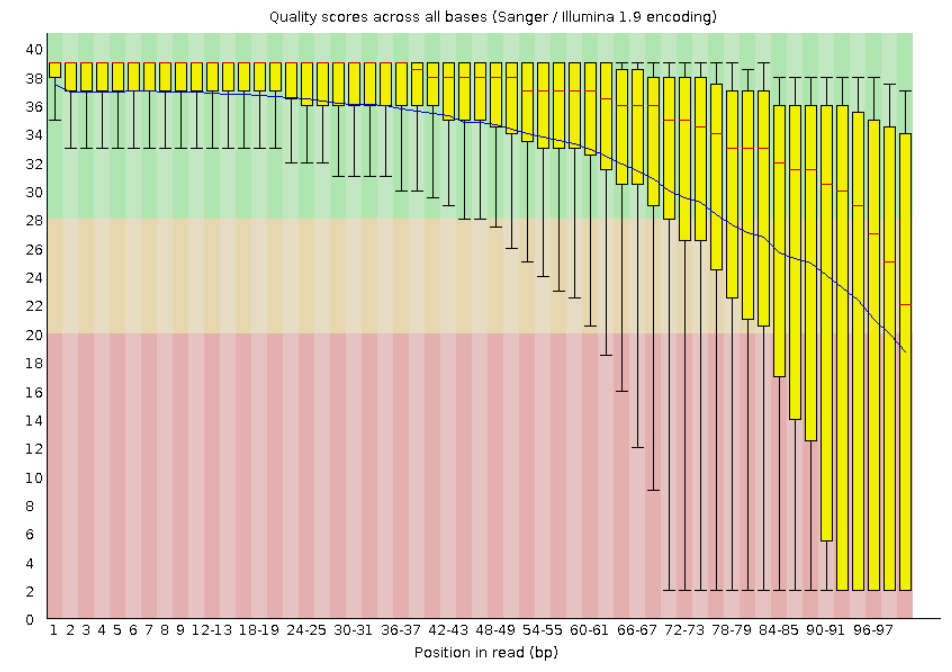

In [48]:
Image("data/100x.2_quality.png")

These graphs match my results